In [1]:
import pandas as pd

# Load the dataset to inspect its structure
TPA_data_file_path = 'dataset/Toy Products on Amazon/Toy Products on Amazon.csv'
TPA_data = pd.read_csv(TPA_data_file_path)

# Display basic information about the dataset to understand its structure
TPA_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 17 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   uniq_id                                      10000 non-null  object 
 1   product_name                                 10000 non-null  object 
 2   manufacturer                                 9993 non-null   object 
 3   price                                        8565 non-null   object 
 4   number_available_in_stock                    7500 non-null   object 
 5   number_of_reviews                            9982 non-null   object 
 6   number_of_answered_questions                 9235 non-null   float64
 7   average_review_rating                        9982 non-null   object 
 8   amazon_category_and_sub_category             9310 non-null   object 
 9   customers_who_bought_this_item_also_bought   8938 non-null   object 
 10 

In [2]:
# Filter data for relevant manufacturers and clean the price column
relevant_manufacturers = ['LEGO', 'Mattel', 'Hasbro', 'Mega Bloks']

# Filter for relevant manufacturers
filtered_TPA_data = TPA_data[TPA_data['manufacturer'].str.contains('|'.join(relevant_manufacturers), na=False, case=False)].copy()

# Extract numerical price values
filtered_TPA_data['price_cleaned'] = filtered_TPA_data['price'].str.replace('[£$,]', '', regex=True).astype(float)

# Keep only necessary columns for analysis
filtered_TPA_data = filtered_TPA_data[['product_name', 'manufacturer', 'price_cleaned', 'amazon_category_and_sub_category']]

# Check for missing data and filter out rows with missing prices
filtered_TPA_data = filtered_TPA_data.dropna(subset=['price_cleaned'])

# Display the cleaned dataset
filtered_TPA_data

,product_name,manufacturer,price_cleaned,amazon_category_and_sub_category
86,Thomas and Friends Track Master Dockside Deliv...,Mattel,13.87,Hobbies > Model Trains & Railway Sets > Rail V...
614,Lego City 2824: Advent Calendar 2010,LEGO,43.87,NaN
626,LEGO Friends 41016: Advent Calendar,LEGO,24.95,NaN
627,LEGO Star Wars 75018: Jek-14's Stealth Starfig...,LEGO,68.87,Characters & Brands > Star Wars > Toys
634,LEGO City 7687 Advent Calendar 2009,LEGO,24.99,NaN
...,...,...,...,...
9962,Star Wars 30th Anniversary #14 Biggs Darklight...,Hasbro,14.99,Characters & Brands > Star Wars > Toys
9971,Star Wars 30th #04 R2-D2 Action Figure,Hasbro,22.69,Characters & Brands > Star Wars > Toys
9979,Albus Dumbledore (Harry Potter Magical Minis C...,Mattel,63.73,Characters & Brands > Harry Potter > Toys
9982,Star Wars Clone Wars - Obi-Wan Kenobi's Starfi...,Hasbro,58.18,Characters & Brands > Star Wars > Toys


In [3]:
# Extract top categories from 'amazon_category_and_sub_category'
filtered_TPA_data['main_category'] = filtered_TPA_data['amazon_category_and_sub_category'].str.split('>').str[0]

# Group by manufacturer and main category to calculate average prices
category_analysis_TPA_data = filtered_TPA_data.groupby(['manufacturer', 'main_category'])['price_cleaned'].mean().reset_index()

# Focus on main categories with significant representation and average prices
category_summary_TPA_data = category_analysis_TPA_data.pivot(index='main_category', columns='manufacturer', values='price_cleaned')

# Display category-level insights to the user
category_summary_TPA_data

manufacturer,Hasbro,LEGO,Mattel,Mattel GmbH,Mega Bloks
main_category,,,,,
Arts & Crafts,NaN,22.525000,NaN,NaN,NaN
Characters & Brands,35.549559,64.976842,22.603000,NaN,NaN
Die-Cast & Toy Vehicles,NaN,NaN,22.953913,13.57,18.66
Dolls & Accessories,NaN,NaN,8.950000,NaN,NaN
Electronic Toys,NaN,6.990000,NaN,NaN,NaN
Figures & Playsets,20.615000,14.333333,26.752500,NaN,20.99
Games,44.990000,NaN,18.154286,10.50,NaN
Hobbies,NaN,46.990000,13.503750,NaN,NaN
Party Supplies,NaN,15.950000,NaN,NaN,NaN


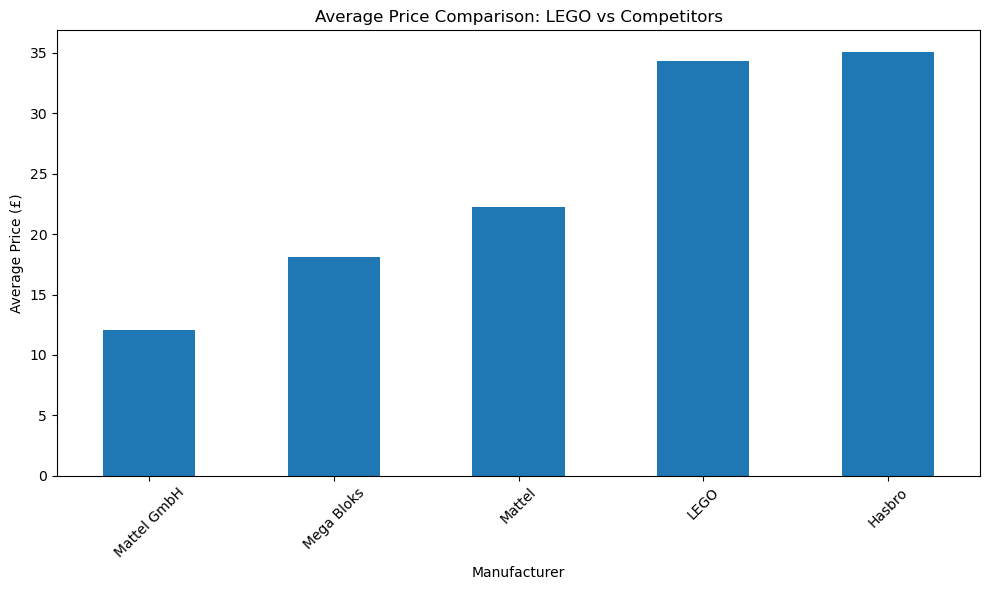

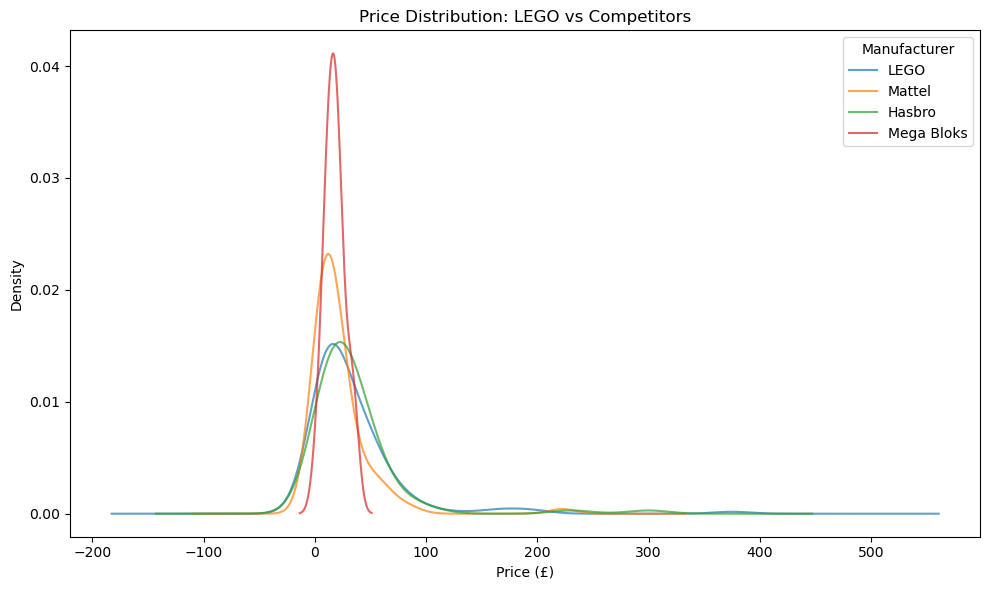

In [4]:
import matplotlib.pyplot as plt

# Calculate average price by manufacturer
average_prices_TPA_data = filtered_TPA_data.groupby('manufacturer')['price_cleaned'].mean().sort_values()

# Plot the average price comparison
plt.figure(figsize=(10, 6))
average_prices_TPA_data.plot(kind='bar')
plt.title('Average Price Comparison: LEGO vs Competitors')
plt.xlabel('Manufacturer')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/Average Price Comparison LEGO vs Competitors.png")
plt.show()

# Calculate price distribution for LEGO vs competitors
plt.figure(figsize=(10, 6))
for manufacturer in relevant_manufacturers:
    subset = filtered_TPA_data[filtered_TPA_data['manufacturer'].str.contains(manufacturer, case=False)]
    subset['price_cleaned'].plot(kind='kde', label=manufacturer, alpha=0.7)
plt.title('Price Distribution: LEGO vs Competitors')
plt.xlabel('Price (£)')
plt.ylabel('Density')
plt.legend(title='Manufacturer')
plt.tight_layout()
plt.savefig("images/Price Distribution LEGO vs Competitors.png")
plt.show()

In [5]:
print(average_prices_TPA_data)

manufacturer
Mattel GmbH    12.035000
Mega Bloks     18.102143
Mattel         22.224416
LEGO           34.357319
Hasbro         35.104933
Name: price_cleaned, dtype: float64


In [6]:
# Load the uploaded files
geo_map_file_path = 'dataset/Google Trends for Lego/geoMap.csv'
lego_sales_file_path = 'dataset/Statista/statistic_id1103051_lego-group-net-sales-2017-2023-by-region.csv'

geo_map_df = pd.read_csv(geo_map_file_path)
lego_sales_df = pd.read_csv(lego_sales_file_path)

# Display the initial few rows to understand the structure of the datasets
geo_map_df.head(), lego_sales_df.head()

(       Country  Interest
 0       Poland     100.0
 1      Hungary      95.0
 2      Denmark      91.0
 3      Czechia      91.0
 4  Netherlands      77.0,
    Year Americas Europe, Middle East & Africa Asia & Pacific
 0  2017   13,457                       15,898          5,028
 1  2018   13,759                       16,644          5,469
 2  2019   14,328                       17,089          6,676
 3  2020   16,345                       19,060          7,857
 4  2021   22,031                       22,906          9,907)

In [7]:
# Define regional groupings
region_mapping = {
    'Americas': [
        'United States', 'Canada', 'Mexico', 'Brazil', 'Argentina', 'Chile', 
        'Colombia', 'Peru', 'Venezuela'
    ],
    'Europe, Middle East & Africa': [
        'United Kingdom', 'Germany', 'France', 'Italy', 'Spain', 'Poland',
        'Netherlands', 'Belgium', 'Sweden', 'Denmark', 'Norway', 'Finland', 
        'Russia', 'Ukraine', 'South Africa', 'Turkey', 'Saudi Arabia', 
        'United Arab Emirates', 'Czechia', 'Hungary', 'Austria'
    ],
    'Asia & Pacific': [
        'China', 'Japan', 'South Korea', 'India', 'Australia', 'New Zealand', 
        'Singapore', 'Malaysia', 'Thailand', 'Indonesia', 'Vietnam', 'Philippines'
    ]
}

# Add a 'Region' column to the geo_map_df based on the country-region mapping
def assign_region(country):
    for region, countries in region_mapping.items():
        if country in countries:
            return region
    return 'Other'  # Default category for unmapped countries

geo_map_df['Region'] = geo_map_df['Country'].apply(assign_region)

# Summarize interest by region
geo_map_grouped = geo_map_df.groupby('Region')['Interest'].mean().reset_index()

# Filter LEGO sales data for 2019-2023
lego_sales_df_filtered = lego_sales_df[lego_sales_df['Year'].isin([2019, 2020, 2021, 2022, 2023])]

# Merge the regional interest with LEGO sales data
geo_map_grouped.rename(columns={'Interest': 'Average Interest'}, inplace=True)
geo_sales_combined = pd.merge(
    lego_sales_df_filtered.melt(id_vars=['Year'], var_name='Region', value_name='Sales'),
    geo_map_grouped,
    on='Region',
    how='left'
)

# Clean the sales values (remove commas and convert to numeric)
geo_sales_combined['Sales'] = geo_sales_combined['Sales'].str.replace(',', '').astype(float)

geo_sales_combined

,Year,Region,Sales,Average Interest
0,2019,Americas,14328.0,21.444444
1,2020,Americas,16345.0,21.444444
2,2021,Americas,22031.0,21.444444
3,2022,Americas,28079.0,21.444444
4,2023,Americas,30636.0,21.444444
5,2019,"Europe, Middle East & Africa",17089.0,53.263158
6,2020,"Europe, Middle East & Africa",19060.0,53.263158
7,2021,"Europe, Middle East & Africa",22906.0,53.263158
8,2022,"Europe, Middle East & Africa",25301.0,53.263158
9,2023,"Europe, Middle East & Africa",25605.0,53.263158


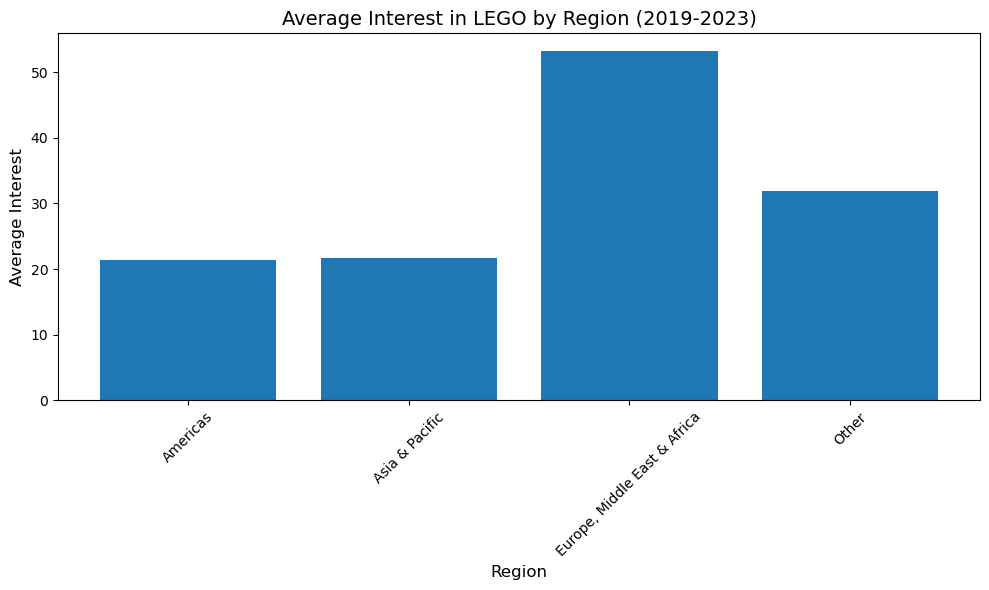

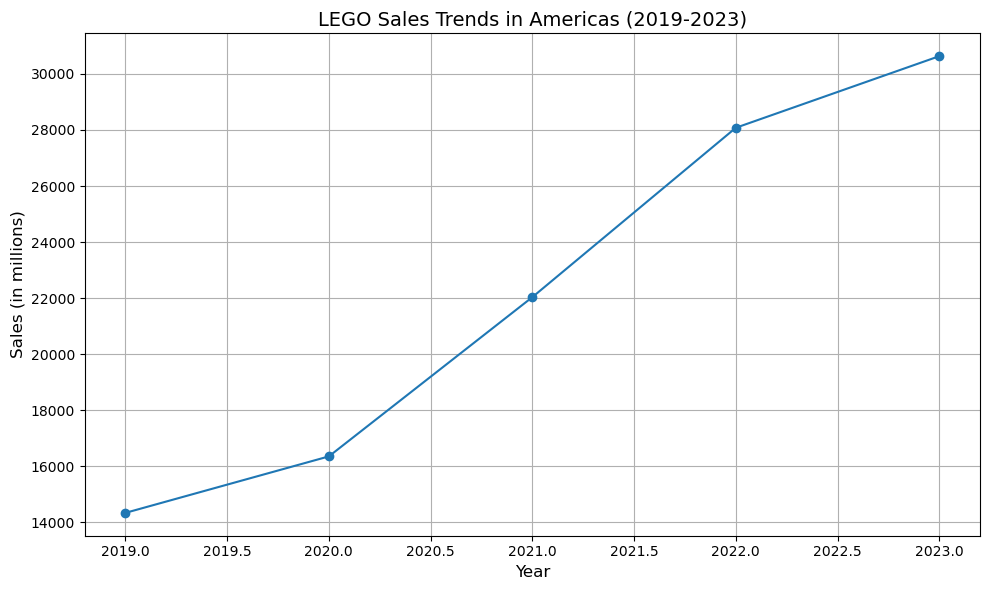

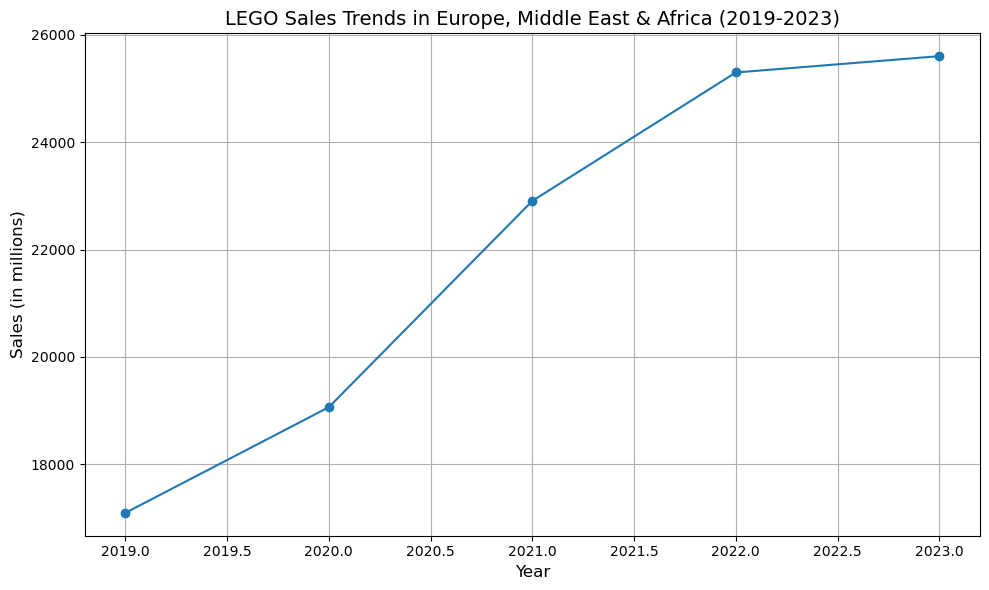

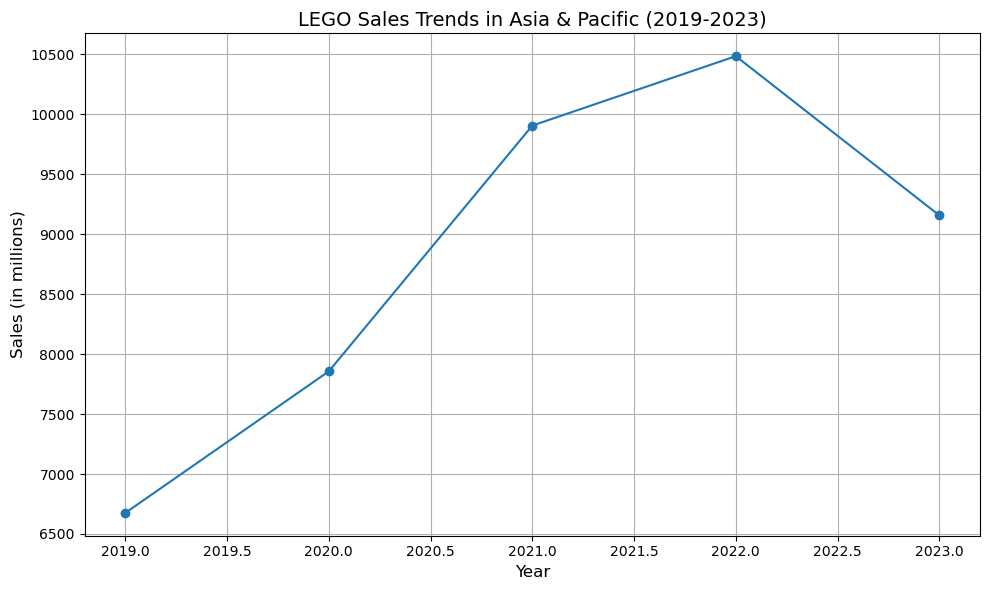

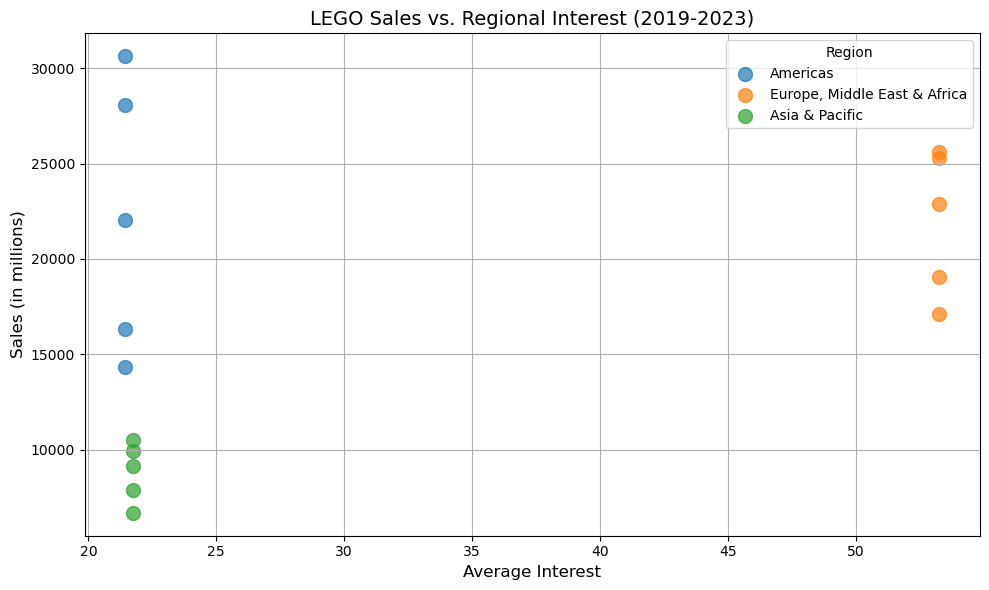

In [8]:
# Visualization 1: Average Interest by Region
plt.figure(figsize=(10, 6))
plt.bar(geo_map_grouped['Region'], geo_map_grouped['Average Interest'])
plt.title('Average Interest in LEGO by Region (2019-2023)', fontsize=14)
plt.ylabel('Average Interest', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("images/Average Interest in LEGO by Region (2019-2023).png")
plt.show()

# Visualization 2: LEGO Sales by Region (2019-2023)
for region in geo_sales_combined['Region'].unique():
    region_sales = geo_sales_combined[geo_sales_combined['Region'] == region]
    plt.figure(figsize=(10, 6))
    plt.plot(region_sales['Year'], region_sales['Sales'], marker='o')
    plt.title(f'LEGO Sales Trends in {region} (2019-2023)', fontsize=14)
    plt.ylabel('Sales (in millions)', fontsize=12)
    plt.xlabel('Year', fontsize=12)
    plt.grid(visible=True)
    plt.tight_layout()
    plt.savefig(f"images/LEGO Sales Trends in {region} (2019-2023).png")
    plt.show()

# Visualization 3: LEGO Sales vs. Interest Comparison
plt.figure(figsize=(10, 6))
for region in geo_sales_combined['Region'].unique():
    region_data = geo_sales_combined[geo_sales_combined['Region'] == region]
    plt.scatter(region_data['Average Interest'], region_data['Sales'], label=region, s=100, alpha=0.7)

plt.title('LEGO Sales vs. Regional Interest (2019-2023)', fontsize=14)
plt.xlabel('Average Interest', fontsize=12)
plt.ylabel('Sales (in millions)', fontsize=12)
plt.legend(title='Region')
plt.grid(visible=True)
plt.tight_layout()
plt.savefig("images/LEGO Sales vs. Regional Interest (2019-2023).png")
plt.show()

In [9]:
# Load the dataset to review its structure and contents
lego_data_file_path = 'dataset/LEGO Sets and Prices Over Time/LEGO Sets and Prices Over Time.csv'
lego_data = pd.read_csv(lego_data_file_path)

# Display the first few rows to understand the structure of the dataset
lego_data.head()

,Set_ID,Name,Year,Theme,Theme_Group,Subtheme,Category,Packaging,Num_Instructions,Availability,Pieces,Minifigures,Owned,Rating,USD_MSRP,Total_Quantity,Current_Price
0,75-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},16.0,NaN,10.0,0.0,NaN,NaN,NaN
1,77-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},20.0,NaN,11.0,0.0,NaN,NaN,NaN
2,077-1,Pre-School Set,1975,Duplo,Pre-school,NaN,Normal,{Not specified},0,{Not specified},21.0,NaN,10.0,0.0,NaN,0.0,NaN
3,78-1,PreSchool Set,1975,PreSchool,Pre-school,NaN,Normal,{Not specified},0,{Not specified},32.0,NaN,8.0,0.0,NaN,NaN,NaN
4,78-3,Basic Set,1975,Samsonite,Vintage,Basic set,Normal,Box,0,{Not specified},330.0,NaN,10.0,0.0,NaN,0.0,NaN


In [10]:
# Filter data for the years 2019-2023 and clean missing values in relevant columns
lego_data_cleaned = lego_data[lego_data['Year'].between(2019, 2023)].copy()

# Convert numerical columns to appropriate types for analysis
numerical_columns = ['Pieces', 'Minifigures', 'Owned', 'Rating', 'USD_MSRP', 'Total_Quantity', 'Current_Price']
lego_data_cleaned[numerical_columns] = lego_data_cleaned[numerical_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with missing values in critical columns (e.g., year, total quantity, and prices)
lego_data_cleaned = lego_data_cleaned.dropna(subset=['Year', 'Total_Quantity', 'USD_MSRP', 'Current_Price'])

# Verify the cleaned dataset
lego_data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1184 entries, 12436 to 14897
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Set_ID            1184 non-null   object 
 1   Name              1184 non-null   object 
 2   Year              1184 non-null   int64  
 3   Theme             1184 non-null   object 
 4   Theme_Group       1184 non-null   object 
 5   Subtheme          1065 non-null   object 
 6   Category          1184 non-null   object 
 7   Packaging         1184 non-null   object 
 8   Num_Instructions  1184 non-null   int64  
 9   Availability      1184 non-null   object 
 10  Pieces            1182 non-null   float64
 11  Minifigures       839 non-null    float64
 12  Owned             1184 non-null   float64
 13  Rating            1184 non-null   float64
 14  USD_MSRP          1184 non-null   float64
 15  Total_Quantity    1184 non-null   float64
 16  Current_Price     1184 non-null   float64


In [11]:
# Group data by year and aggregate total sales and average prices
yearly_trends = lego_data_cleaned.groupby('Year').agg(
    Total_Sales=('Total_Quantity', 'sum'),
    Avg_MSRP=('USD_MSRP', 'mean'),
    Avg_Resale=('Current_Price', 'mean')
).reset_index()
yearly_trends

,Year,Total_Sales,Avg_MSRP,Avg_Resale
0,2019,4922.0,52.360861,61.754787
1,2020,5837.0,53.807732,56.339890
2,2021,2879.0,52.141155,45.726881
3,2022,2375.0,69.384856,55.690792
4,2023,370.0,59.820282,52.163237


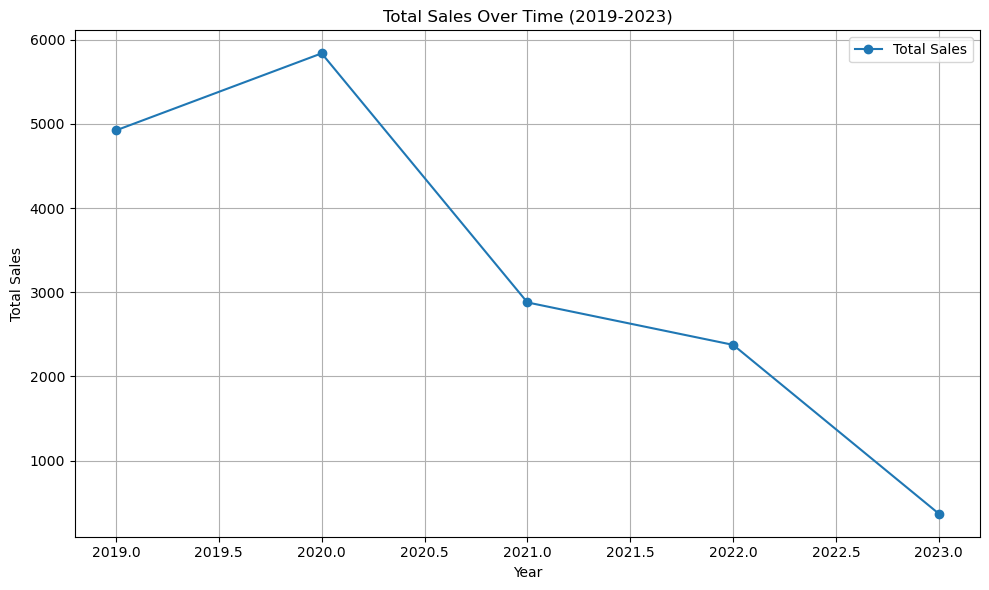

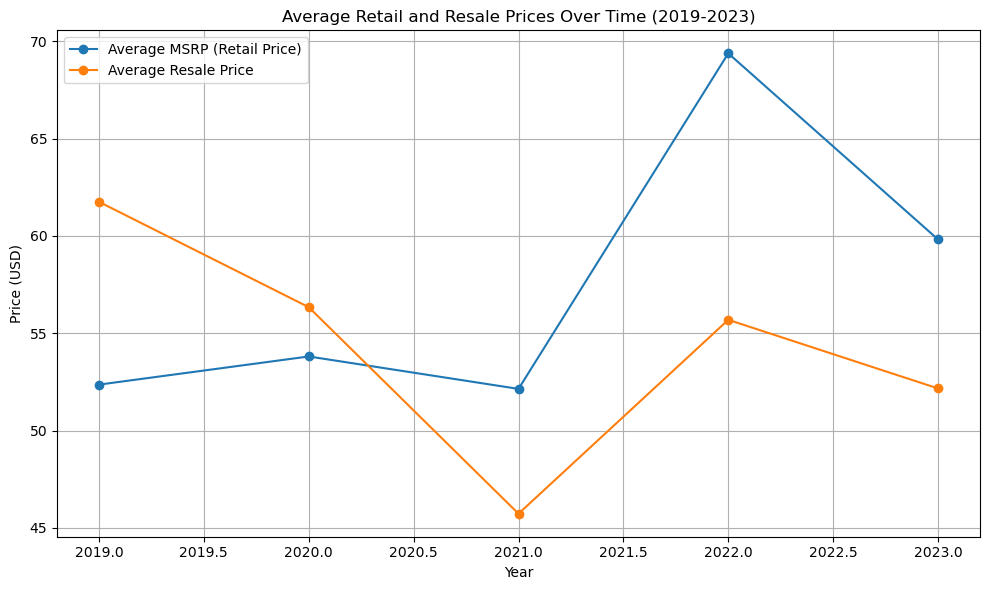

In [12]:
# Plot total sales over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_trends['Year'], yearly_trends['Total_Sales'], marker='o', label='Total Sales')
plt.title('Total Sales Over Time (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("images/Total Sales Over Time (2019-2023).png")
plt.show()

# Plot average MSRP and Resale Price over time
plt.figure(figsize=(10, 6))
plt.plot(yearly_trends['Year'], yearly_trends['Avg_MSRP'], marker='o', label='Average MSRP (Retail Price)')
plt.plot(yearly_trends['Year'], yearly_trends['Avg_Resale'], marker='o', label='Average Resale Price')
plt.title('Average Retail and Resale Prices Over Time (2019-2023)')
plt.xlabel('Year')
plt.ylabel('Price (USD)')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("images/Average Retail and Resale Prices Over Time (2019-2023).png")
plt.show()

In [13]:
# Group by Theme and Category to analyze performance
theme_performance = lego_data_cleaned.groupby(['Theme']).agg(
    Total_Sales=('Total_Quantity', 'sum'),
    Avg_MSRP=('USD_MSRP', 'mean'),
    Avg_Resale=('Current_Price', 'mean')
).reset_index()
theme_performance

,Theme,Total_Sales,Avg_MSRP,Avg_Resale
0,Architecture,156.0,83.990000,76.908960
1,Art,153.0,129.990000,125.835855
2,Avatar,11.0,78.740000,64.247500
3,Brick Sketches,29.0,16.990000,15.966175
4,BrickHeadz,655.0,15.008182,19.332891
5,City,1236.0,44.153121,35.655780
6,Classic,161.0,25.240000,19.606375
7,Collectable Minifigures,23.0,23.160000,24.933660
8,Creator,589.0,30.317586,28.832719
9,Creator Expert,239.0,157.490000,168.875200


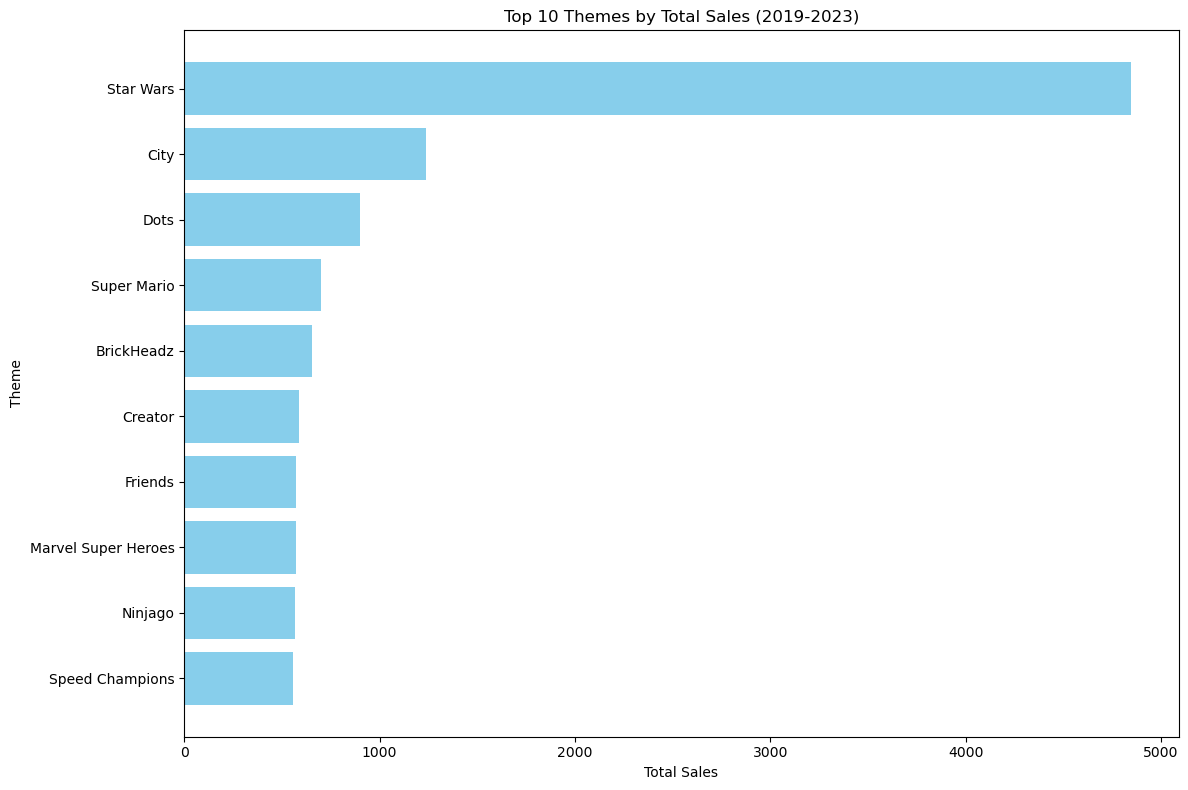

In [14]:
# Identify the top 10 themes by total sales
top_themes = theme_performance.nlargest(10, 'Total_Sales')

# Visualize top themes by total sales
plt.figure(figsize=(12, 8))
plt.barh(top_themes['Theme'], top_themes['Total_Sales'], color='skyblue')
plt.title('Top 10 Themes by Total Sales (2019-2023)')
plt.xlabel('Total Sales')
plt.ylabel('Theme')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.savefig("images/Top 10 Themes by Total Sales (2019-2023).png")
plt.show()

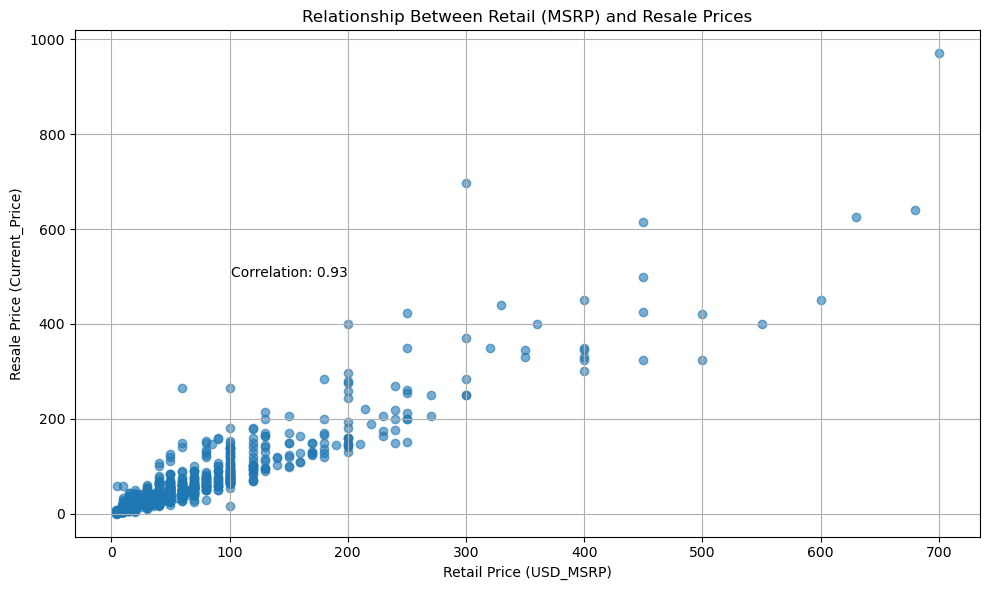

0.9295498358870351

In [15]:
# Calculate and display the correlation between MSRP and Resale Price
correlation = lego_data_cleaned['USD_MSRP'].corr(lego_data_cleaned['Current_Price'])

# Analyze the relationship between MSRP and Resale Prices
plt.figure(figsize=(10, 6))
plt.scatter(lego_data_cleaned['USD_MSRP'], lego_data_cleaned['Current_Price'], alpha=0.6)
plt.title('Relationship Between Retail (MSRP) and Resale Prices')
plt.xlabel('Retail Price (USD_MSRP)')
plt.ylabel('Resale Price (Current_Price)')
plt.grid(True)
plt.annotate(text = f'Correlation: {correlation:.2f}', xy = (101,500))
plt.tight_layout()
plt.savefig("images/Relationship Between Retail (MSRP) and Resale Prices.png")
plt.show()

correlation